# Car Price Prediction
#### Predicting selling price of old cars using price dataset from Cardekho.com (Kaggle) 

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('cardekho.csv')

In [5]:
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,present_price,mileage,selling_price
0,Maruti Wagon R,Maruti,Wagon R,3,52000,Dealer,CNG,Manual,619000,33.54,435000
1,Maruti Wagon R,Maruti,Wagon R,8,64000,Dealer,CNG,Manual,600500,33.54,270000
2,Honda Amaze,Honda,Amaze,8,64000,Dealer,CNG,Manual,933984,18.00,349000
3,Maruti Celerio,Maruti,Celerio,3,28000,Dealer,CNG,Manual,598326,31.79,455000
4,Maruti Wagon R,Maruti,Wagon R,5,83000,Dealer,CNG,Manual,602000,26.60,345000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15407 entries, 0 to 15406
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15407 non-null  object 
 1   brand              15407 non-null  object 
 2   model              15407 non-null  object 
 3   vehicle_age        15407 non-null  int64  
 4   km_driven          15407 non-null  int64  
 5   seller_type        15407 non-null  object 
 6   fuel_type          15407 non-null  object 
 7   transmission_type  15407 non-null  object 
 8   present_price      15407 non-null  int64  
 9   mileage            15407 non-null  float64
 10  selling_price      15407 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 1.3+ MB


In [7]:
data.groupby(["seller_type"]).count()

,car_name,brand,model,vehicle_age,km_driven,fuel_type,transmission_type,present_price,mileage,selling_price
seller_type,,,,,,,,,,
Dealer,9709,9709,9709,9709,9709,9709,9709,9709,9709,9709
Individual,5698,5698,5698,5698,5698,5698,5698,5698,5698,5698


In [8]:
print(data.groupby(["fuel_type"]).count())
print(data.groupby(["transmission_type"]).count())


           car_name  brand  model  vehicle_age  km_driven  seller_type  \
fuel_type                                                                
CNG             301    301    301          301        301          301   
Diesel         7419   7419   7419         7419       7419         7419   
LPG              44     44     44           44         44           44   
Petrol         7643   7643   7643         7643       7643         7643   

           transmission_type  present_price  mileage  selling_price  
fuel_type                                                            
CNG                      301            301      301            301  
Diesel                  7419           7419     7419           7419  
LPG                       44             44       44             44  
Petrol                  7643           7643     7643           7643  
                   car_name  brand  model  vehicle_age  km_driven  \
transmission_type                                                 

In [9]:
# checking null values
data.isna().any()

car_name             False
brand                False
model                False
vehicle_age          False
km_driven            False
seller_type          False
fuel_type            False
transmission_type    False
present_price        False
mileage              False
selling_price        False
dtype: bool

#### No Null Values

In [10]:
data.describe()

,vehicle_age,km_driven,present_price,mileage,selling_price
count,15407.000000,1.540700e+04,1.540700e+04,15407.000000,1.540700e+04
mean,6.036412,5.561414e+04,3.927634e+06,19.701292,7.746911e+05
std,3.013671,5.162463e+04,2.887771e+07,4.171797,8.940739e+05
min,0.000000,1.000000e+02,3.810000e+05,4.000000,4.000000e+04
25%,4.000000,3.000000e+04,7.520000e+05,17.000000,3.850000e+05
50%,6.000000,5.000000e+04,1.038372e+06,19.670000,5.560000e+05
75%,8.000000,7.000000e+04,1.545000e+06,22.700000,8.235000e+05
max,29.000000,3.800000e+06,4.993500e+08,33.540000,3.950000e+07


In [11]:
data.columns

Index(['car_name', 'brand', 'model', 'vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'present_price', 'mileage',
       'selling_price'],
      dtype='object')

In [26]:
final_data = data[['vehicle_age', 'km_driven', 'seller_type',
       'fuel_type', 'transmission_type', 'present_price', 'mileage',
       'selling_price']]

In [27]:
final_data.head()

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,present_price,mileage,selling_price
0,3,52000,Dealer,CNG,Manual,619000,33.54,435000
1,8,64000,Dealer,CNG,Manual,600500,33.54,270000
2,8,64000,Dealer,CNG,Manual,933984,18.00,349000
3,3,28000,Dealer,CNG,Manual,598326,31.79,455000
4,5,83000,Dealer,CNG,Manual,602000,26.60,345000


In [28]:
# Convert all the non-numerical columns using one-hot encoding
final_data = pd.get_dummies(final_data)

In [29]:
final_data

,vehicle_age,km_driven,present_price,mileage,selling_price,seller_type_Dealer,seller_type_Individual,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,3,52000,619000,33.54,435000,1,0,1,0,0,0,0,1
1,8,64000,600500,33.54,270000,1,0,1,0,0,0,0,1
2,8,64000,933984,18.00,349000,1,0,1,0,0,0,0,1
3,3,28000,598326,31.79,455000,1,0,1,0,0,0,0,1
4,5,83000,602000,26.60,345000,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15402,8,64321,1057500,18.50,430000,1,0,0,0,0,1,0,1
15403,4,54202,559500,23.10,435000,1,0,0,0,0,1,1,0
15404,3,10503,710000,20.89,535000,1,0,0,0,0,1,1,0
15405,3,21052,1146500,19.12,885000,1,0,0,0,0,1,1,0


In [30]:
# Correlation
final_data.corr()

,vehicle_age,km_driven,present_price,mileage,selling_price,seller_type_Dealer,seller_type_Individual,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
vehicle_age,1.000000,0.333910,0.037506,-0.257399,-0.241868,0.032634,-0.032634,-0.024426,0.013572,0.089760,-0.016382,-0.080703,0.080703
km_driven,0.333910,1.000000,0.000301,-0.105235,-0.080101,-0.060075,0.060075,-0.003288,0.249886,0.022334,-0.251197,-0.073628,0.073628
present_price,0.037506,0.000301,1.000000,-0.151769,0.257333,0.055280,-0.055280,-0.015853,0.022436,-0.006105,-0.017381,0.165079,-0.165079
mileage,-0.257399,-0.105235,-0.151769,1.000000,-0.305567,-0.073703,0.073703,0.206861,0.082875,-0.023924,-0.137529,-0.282813,0.282813
selling_price,-0.241868,-0.080101,0.257333,-0.305567,1.000000,0.134574,-0.134574,-0.056367,0.243375,-0.034025,-0.223982,0.459096,-0.459096
seller_type_Dealer,0.032634,-0.060075,0.055280,-0.073703,0.134574,1.000000,-1.000000,0.041110,0.006399,-0.029547,-0.014622,0.201864,-0.201864
seller_type_Individual,-0.032634,0.060075,-0.055280,0.073703,-0.134574,-1.000000,1.000000,-0.041110,-0.006399,0.029547,0.014622,-0.201864,0.201864
fuel_type_CNG,-0.024426,-0.003288,-0.015853,0.206861,-0.056367,0.041110,-0.041110,1.000000,-0.136039,-0.007554,-0.140055,-0.072017,0.072017
fuel_type_Diesel,0.013572,0.249886,0.022436,0.082875,0.243375,0.006399,-0.006399,-0.136039,1.000000,-0.051575,-0.956187,0.032653,-0.032653
fuel_type_LPG,0.089760,0.022334,-0.006105,-0.023924,-0.034025,-0.029547,0.029547,-0.007554,-0.051575,1.000000,-0.053098,-0.027303,0.027303


<AxesSubplot:>

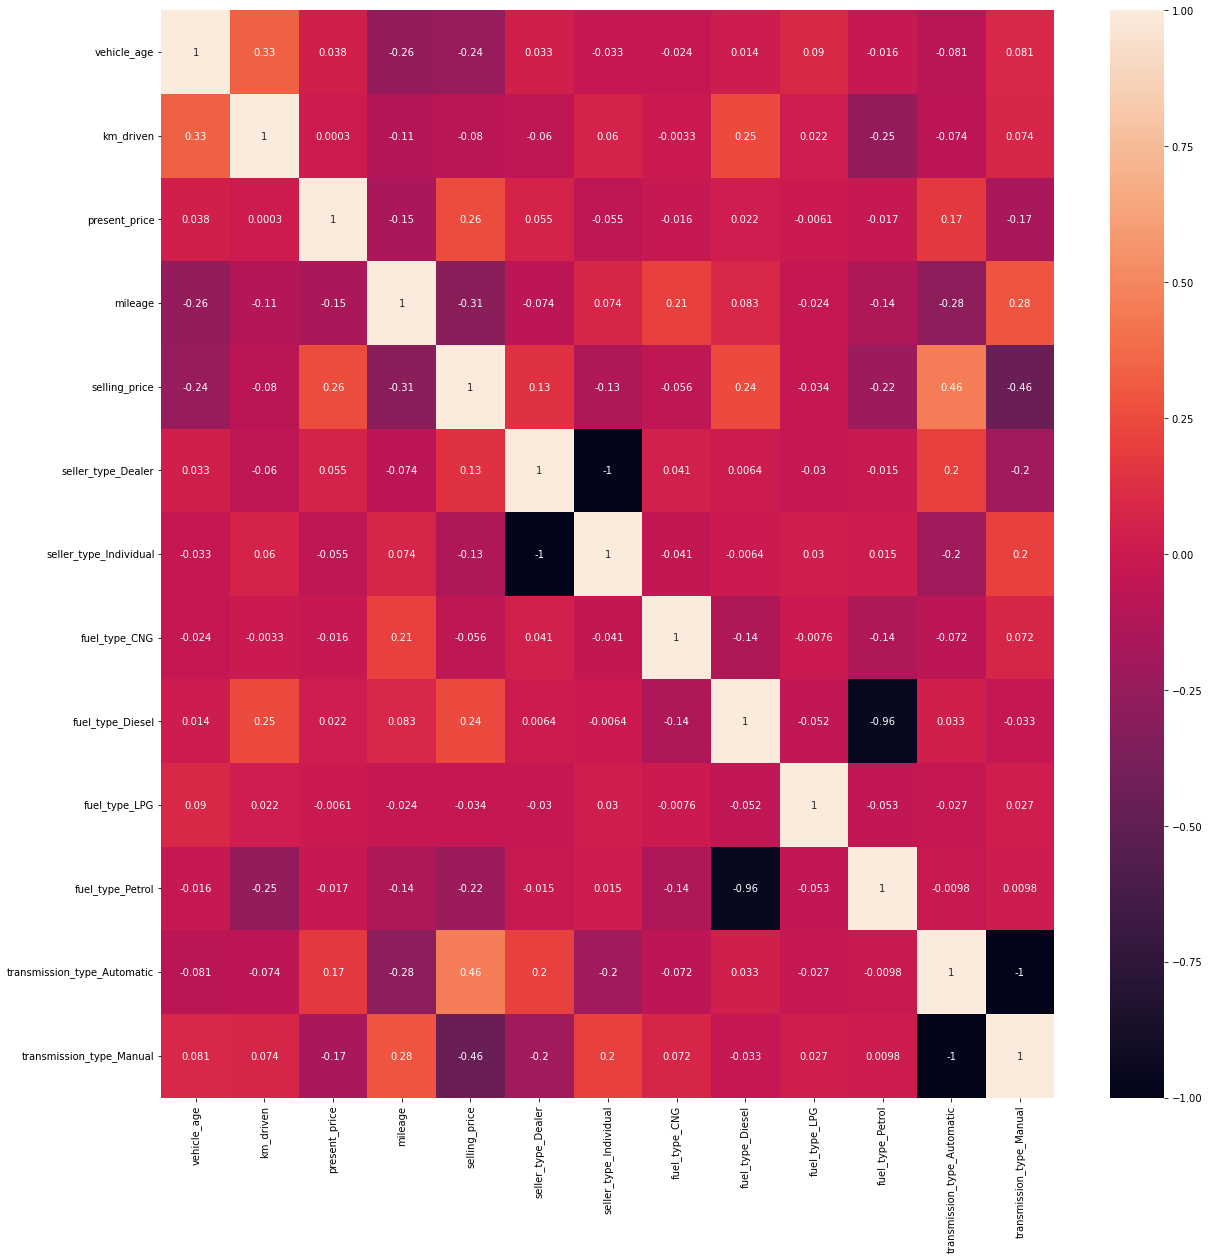

In [31]:
# Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
relation = final_data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(relation,annot=True)

In [32]:
final_data.columns

Index(['vehicle_age', 'km_driven', 'present_price', 'mileage', 'selling_price',
       'seller_type_Dealer', 'seller_type_Individual', 'fuel_type_CNG',
       'fuel_type_Diesel', 'fuel_type_LPG', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual'],
      dtype='object')

In [33]:
x = final_data[['vehicle_age', 'km_driven', 'present_price', 'mileage',
       'seller_type_Dealer', 'seller_type_Individual', 'fuel_type_CNG',
       'fuel_type_Diesel', 'fuel_type_LPG', 'fuel_type_Petrol',
       'transmission_type_Automatic', 'transmission_type_Manual']]
y = final_data['selling_price']

### Feature importance

In [34]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[1.40264008e-01 8.47313467e-02 2.68398981e-01 1.95856448e-01
 7.90336283e-03 7.19605404e-03 5.40911021e-05 4.67475930e-02
 1.61144945e-05 3.80062920e-02 1.03305197e-01 1.07520511e-01]


#### Mileage is highly important feature

### Splitting Dataset

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [37]:
y_test.dtypes

dtype('int64')

## Using Random Forest Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor()

### Hyperparameter tuning

In [39]:
n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200]
max_features = ['auto','sqrt']
max_depth = [5,10,15,20,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf =[1,2,5,10]

In [40]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf': min_samples_leaf
}

In [42]:
rf_random = RandomizedSearchCV(estimator = random, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state = 42, n_jobs =1)

In [43]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [45]:
x_test

,vehicle_age,km_driven,present_price,mileage,seller_type_Dealer,seller_type_Individual,fuel_type_CNG,fuel_type_Diesel,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
2996,3,55000,7793500,22.48,1,0,0,1,0,0,1,0
6880,11,42000,964500,16.00,1,0,0,0,0,1,0,1
6741,10,63000,730000,20.36,1,0,0,0,0,1,0,1
3509,4,62000,1081500,24.30,1,0,0,1,0,0,0,1
764,4,21356,2827500,17.10,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8631,4,25100,707120,18.90,1,0,0,0,0,1,0,1
11616,7,177000,1939000,15.10,0,1,0,1,0,0,0,1
7375,13,75000,713827,19.81,1,0,0,0,0,1,0,1
7919,3,20000,1038500,19.34,1,0,0,0,0,1,0,1


In [46]:
y_predict = rf_random.predict(x_test)


In [47]:
y_predict = pd.DataFrame(y_predict)

In [48]:
y_predict.head()

,0
0,4.150676e+06
1,2.833634e+05
2,3.014422e+05
3,8.092934e+05
4,1.588812e+06


In [49]:
y_test.head()

2996    3990000
6880     280000
6741     320000
3509     650000
764     1645000
Name: selling_price, dtype: int64

C:\Users\Atul\anaconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

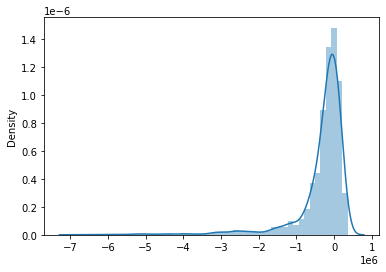

In [50]:
#comparing the prediction using distance plot
sns.distplot(y_test - y_predict)

#### Predicted value is very close to real value

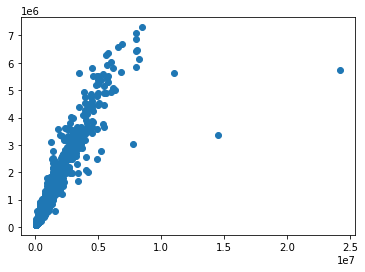

In [51]:
plt.scatter(y_test,y_predict)

In [52]:

from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)
print('Accuracy:', score)

Accuracy: 0.8191550471221284


### Accuracy of the model is 81.92%

## Model Deployment

In [55]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)